<a href="https://colab.research.google.com/github/aah217/ai-science-training-series/blob/main/04_modern_neural_networks/homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
!pip install python3-wget
import wget
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python3-wget: filename=python3_wget-0.0.2b1-py3-none-any.whl size=8014 sha256=d22656abb96bc2117270f1406b2ad6aa4263dabe6eda8654c8bdc30a022114b8
  Stored in directory: /root/.cache/pip/wheels/52/35/d2/b16d60fcf42b7dcf597af854f195085d62722dd7f5a71ecc25
  Created wheel for hurry.filesize: filename=hurry.filesize-0.9-py3-none-any.whl size=4133 sha256=fe0934e345f592d9cb101507d612929d18152b0a0acfda41a3fe0c8a80783041
  Stored in directory: /root/.cache/pip/wheels/2c/99/7f/8c88c372b4bd642a731232e63cb89467554f6cea7708574e49
Successfully built python3-wget hurry.filesize


In [54]:
filename = wget.download('https://raw.githubusercontent.com/aah217/ai-science-training-series/main/04_modern_neural_networks/10110184.output')
with open(filename) as f:
  times = []
  accus = []
  losses = []
  for line in f:
    check = re.match(r"Validation",line)
    if check is not None: 
      #break at end of first epoch
      break
    check = re.match(r"Finished",line)
    if check is not None: 
      #grab stuff
      times.append(float(re.search("step (\d+)",line).group(1)))
      losses.append(float(re.search("loss=(.+),",line).group(1)))
      accus.append(float(re.search(r"acc=(.+) \(",line).group(1)))
#check the amount of data we grabbed makes sense
print(len(times))
print(len(times)==len(accus) and len(accus)==len(losses))

5004
True


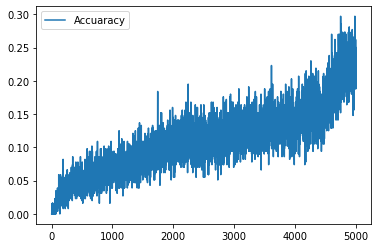

In [50]:
plt.plot(times,accus,label="Accuaracy")
plt.legend()


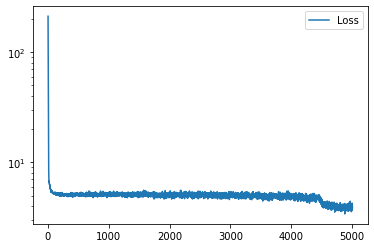

In [52]:
plt.plot(times,losses,label="Loss")
plt.yscale("log")
plt.legend()